<a href="https://colab.research.google.com/github/Radityaprama/Analisa-Sentimen-Publik-Terhadap-Respon-Pemecatan-Shin-Tae-Yong/blob/main/Analisis_Respon_Publik_Shin_Tae_Yong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Library yang Dibutuhkan
!pip install networkx matplotlib pandas

# Step 2: Import Library
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Step 3: Upload File CSV
from google.colab import files

# Step 4: Membaca Dataset
# Pastikan nama file sesuai dengan yang diunggah
file_name = "source_target.csv"  # Ganti nama file jika berbeda
data = pd.read_csv(file_name)

In [ ]:
# Melihat beberapa baris data
print("Contoh data:")
print(data)

Contoh data:
              Source           Target                       Timestamp
0         Inirinny12              NaN  Sun Jan 05 23:56:48 +0000 2025
1     achmadcanthink              NaN  Sun Jan 05 23:53:37 +0000 2025
2      changcutpanda              NaN  Sun Jan 05 23:50:51 +0000 2025
3    TheReal_ABCDoel  TheReal_ABCDoel  Sun Jan 05 23:28:05 +0000 2025
4    TheReal_ABCDoel              NaN  Sun Jan 05 23:23:13 +0000 2025
..               ...              ...                             ...
205           uran0z   kdrama_menfess  Thu Jan 02 09:11:21 +0000 2025
206         Atuung95      punditgagal  Thu Jan 02 07:53:49 +0000 2025
207         IvanFu18   kdrama_menfess  Thu Jan 02 07:15:09 +0000 2025
208    jakefrmdawiic           Thll3_  Thu Jan 02 03:42:36 +0000 2025
209       didbigboy_              NaN  Thu Jan 02 01:58:13 +0000 2025

[210 rows x 3 columns]


In [ ]:
df = pd.DataFrame(data)
G = nx.from_pandas_edgelist(df, 'Source', 'Target')

# Count the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Output the results
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

Number of Nodes: 203
Number of Edges: 188


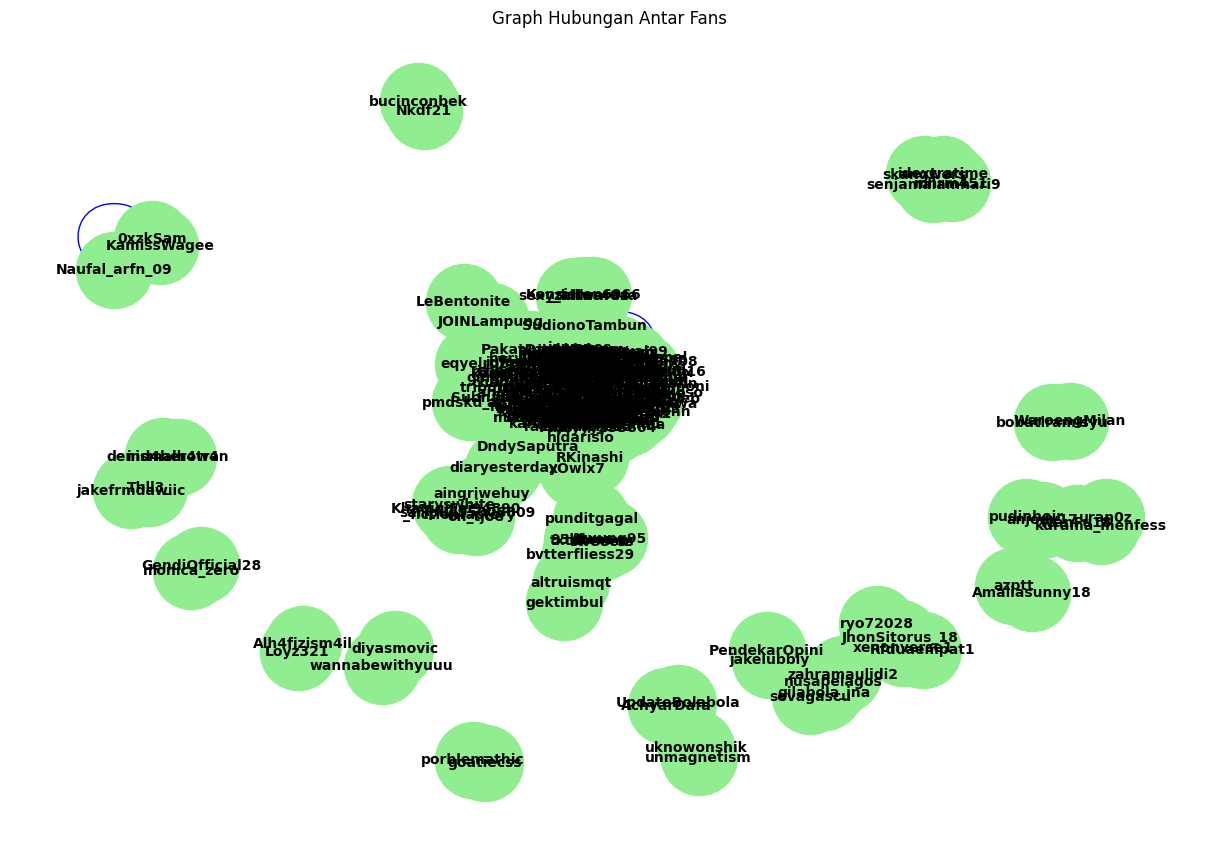

Graph berhasil diekspor ke file 'graph_fans_shin_tae_yong.gexf'


In [ ]:

# Step 5: Membuat Graph dari Hubungan Fans
# Asumsi dataset memiliki kolom 'Fan1' dan 'Fan2' yang menunjukkan hubungan antar fans
G = nx.Graph()

# Tambahkan edges ke graph dari dataset
for _, row in data.iterrows():
    G.add_edge(row["Source"], row["Target"])

# Step 6: Visualisasi Graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Tata letak menggunakan spring layout
nx.draw(
    G, pos,
    with_labels=True,
    node_color="lightgreen",
    node_size=3000,
    font_size=10,
    font_weight="bold",
    edge_color="blue"
)
plt.title("Graph Hubungan Antar Fans")
plt.show()

# Step 7: Menyimpan Graph ke File (Opsional)
# Ekspor graph ke format GEXF untuk digunakan di Gephi
nx.write_gexf(G, "graph_fans_shin_tae_yong.gexf")
print("Graph berhasil diekspor ke file 'graph_fans_shin_tae_yong.gexf'")


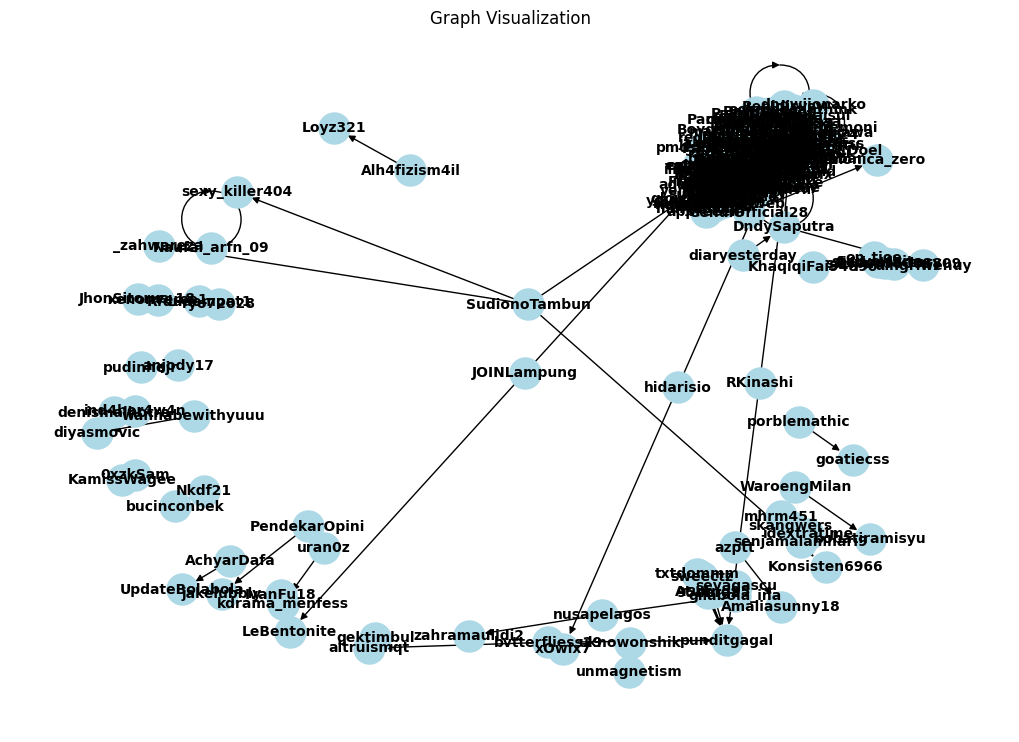


Centrality Metrics:
                Node  Degree Centrality  Betweenness Centrality  \
0         Inirinny12           0.004950                     0.0   
1                NaN           0.668317                     0.0   
2     achmadcanthink           0.004950                     0.0   
3      changcutpanda           0.004950                     0.0   
4    TheReal_ABCDoel           0.014851                     0.0   
..               ...                ...                     ...   
198         Atuung95           0.004950                     0.0   
199         IvanFu18           0.004950                     0.0   
200    jakefrmdawiic           0.004950                     0.0   
201           Thll3_           0.004950                     0.0   
202       didbigboy_           0.004950                     0.0   

     Closeness Centrality  
0                0.000000  
1                0.668871  
2                0.000000  
3                0.000000  
4                0.000000  
..    

In [ ]:
G = nx.DiGraph()
G.add_edges_from(zip(data['Source'], data['Target']))

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph Visualization")
plt.show()

# Compute centrality metrics
print("\nCentrality Metrics:")
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Convert centrality metrics to DataFrame for easier visualization
centrality_df = pd.DataFrame({
    'Node': list(G.nodes),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes]
})

# Display the centrality metrics
print(centrality_df)

# Save the centrality metrics to a CSV file
output_path = "/content/centrality_metrics.csv"
centrality_df.to_csv(output_path, index=False)
print(f"\nCentrality metrics saved to {output_path}")


In [ ]:
data = data.dropna(subset=['Source', 'Target', 'Timestamp'])

# Build a directed graph (use nx.Graph() for an undirected graph)
G = nx.DiGraph()
G.add_edges_from(zip(data['Source'], data['Target']))

# Compute centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Find the most and least central nodes
most_centrality_node = max(degree_centrality, key=degree_centrality.get)
least_centrality_node = min(degree_centrality, key=degree_centrality.get)

most_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
least_betweenness_node = min(betweenness_centrality, key=betweenness_centrality.get)

most_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
least_closeness_node = min(closeness_centrality, key=closeness_centrality.get)

# Display the results
print("\nResults:")
print(f"Most Centrality: {most_centrality_node}")
print(f"Least Centrality: {least_centrality_node}")

print(f"Most Betweenness: {most_betweenness_node}")
print(f"Least Betweenness: {least_betweenness_node}")

print(f"Most Closeness: {most_closeness_node}")
print(f"Least Closeness: {least_closeness_node}")


Results:
Most Centrality: aingriwehuy
Least Centrality: KamissWagee
Most Betweenness: DndySaputra
Least Betweenness: TheReal_ABCDoel
Most Closeness: aingriwehuy
Least Closeness: TheReal_ABCDoel


In [ ]:
# Build an undirected graph (communities are typically detected on undirected graphs)
G = nx.Graph()
# Ensure the nodes are represented as strings for comparability
G.add_edges_from([(str(row['Source']), str(row['Target'])) for _, row in data.iterrows()])

# Detect communities using the greedy modularity algorithm
communities = list(greedy_modularity_communities(G))

# Display the detected communities
print("\nCommunities:")
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {sorted(community)}")

# Save communities to a file
community_df = pd.DataFrame({
    'Community': [f"Community {i + 1}" for i in range(len(communities))],
    'Nodes': [sorted(list(community)) for community in communities]
})


Communities:
Community 1: ['95libraz', 'Atuung95', 'RKinashi', 'altruismqt', 'bvtterfliess29', 'gektimbul', 'punditgagal', 'sweectz', 'txtdommm']
Community 2: ['DndySaputra', 'KhaqiqiFai94890', '_fictionfactory', 'aingriwehuy', 'diaryesterday', 'on_tjoe', 'saripud95008809', 'staryswhite']
Community 3: ['Konsisten6966', 'SudionoTambun', '_zahwareza', 'sexy_killer404']
Community 4: ['gilabola_ina', 'nusapelagos', 'sevagascu', 'zahramaulidi2']
Community 5: ['JhonSitorus_18', 'Rfduaempat1', 'ryo72028', 'xenonverse1']
Community 6: ['idextratime', 'mhrm451', 'senjamalamhari9', 'skangwers']
Community 7: ['JOINLampung', 'LeBentonite', 'PakatDayak_']
Community 8: ['IvanFu18', 'kdrama_menfess', 'uran0z']
Community 9: ['0xzkSam', 'KamissWagee']
Community 10: ['anjody17', 'pudinhojr']
Community 11: ['goatiecss', 'porblemathic']
Community 12: ['hidarisio', 'xOwlx7']
Community 13: ['AchyarDafa', 'UpdateBolabola']
Community 14: ['diyasmovic', 'wannabewithyuuu']
Community 15: ['WaroengMilan', 'bobati

In [ ]:
# Calculate the most and least interacted users
interaction_counts = data['Source'].value_counts() + data['Target'].value_counts()
most_interacted_user = interaction_counts.idxmax()
least_interacted_user = interaction_counts.idxmin()

# Display the results
print("\nInteraction Results:")
print(f"Most Interacted User: {most_interacted_user} with {interaction_counts[most_interacted_user]} interactions")
print(f"Least Interacted User: {least_interacted_user} with {interaction_counts[least_interacted_user]} interactions")


Interaction Results:
Most Interacted User: DndySaputra with 4.0 interactions
Least Interacted User: Naufal_arfn_09 with 2.0 interactions


In [ ]:
# Convert 'Timestamp' to datetime with a specified format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%a %b %d %H:%M:%S %z %Y', errors='coerce')

# Drop rows where 'Timestamp' could not be converted
data = data.dropna(subset=['Timestamp'])

# Find the newest and oldest tweets
newest_tweet = data.loc[data['Timestamp'].idxmax()]
oldest_tweet = data.loc[data['Timestamp'].idxmin()]

# Display the newest and oldest tweets
print("\nTimestamp Results:")
print(f"Newest Tweet: {newest_tweet['Timestamp']} by {newest_tweet['Source']} -> {newest_tweet['Target']}")
print(f"Oldest Tweet: {oldest_tweet['Timestamp']} by {oldest_tweet['Source']} -> {oldest_tweet['Target']}")


Timestamp Results:
Newest Tweet: 2025-01-05 23:28:05+00:00 by TheReal_ABCDoel -> TheReal_ABCDoel
Oldest Tweet: 2025-01-02 03:42:36+00:00 by jakefrmdawiic -> Thll3_


In [ ]:
!pip install transformers textblob

import pandas as pd
from transformers import pipeline
from textblob import TextBlob

# Load your Twitter data into a Pandas DataFrame
data = pd.read_csv('Shin_Tae-yong.csv')

# Check the actual column names in